In [45]:
import os
import pandas as pd
df = pd.read_csv('C:/Users/Admin/Downloads/commit.csv')
pr_df = pd.read_csv('C:/Users/Admin/Downloads/pr.csv')
issue_df = pd.read_csv('C:/Users/Admin/Downloads/issue.csv')
files_df = pd.read_csv('C:/Users/Admin/Downloads/file_data.csv')
language_df = pd.read_csv('C:/Users/Admin/Downloads/languages.csv')

In [46]:
pr_df['Date'] = pd.to_datetime(pr_df['Created_at']).dt.date

In [47]:
df['Date'] = pd.to_datetime(pr_df['Created_at']).dt.date

In [48]:
pr_df['Date']

0       2022-02-06
1       2022-02-06
2       2022-02-07
3       2022-02-08
4       2022-02-08
           ...    
4413    2024-06-13
4414    2024-06-13
4415    2024-06-13
4416    2024-06-13
4417    2024-06-13
Name: Date, Length: 4418, dtype: object

In [83]:
pr_df['Rejected'] = (pr_df['Merged_at'].isnull()) & (pr_df['Pr_state'] =='open')

In [104]:
for i in range(pr_df.shape[0]):
    if pr_df['Rejected'].loc[i] == True:
        pr_df['Rejected'].loc[i] =1
    else:
        pr_df['Rejected'].loc[i] =0

C:\Users\Admin\AppData\Local\Temp\ipykernel_12692\3251279963.py:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  pr_df['Rejected'].loc[i] =0
C:\Users\Admin\AppData\Local\Temp\ipykernel_12692\3251279963.py:3: FutureWarning: ChainedAssignmentE

In [108]:
pr_df

,Author,Reviewer,Pr_state,Created_at,Updated_at,Additions,Commits,Merged_at,Date,Rejected
0,alextran1502,NaN,closed,2022-02-06 06:07:43,2024-05-29 17:11:53,581,14,2022-02-06 06:07:56,2022-02-06,0
1,schklom,NaN,closed,2022-02-06 18:08:06,2024-03-09 04:16:39,53,2,2022-02-06 19:06:01,2022-02-06,0
2,alextran1502,NaN,closed,2022-02-07 02:28:28,2024-03-09 23:22:33,133,3,2022-02-07 02:31:32,2022-02-07,0
3,alextran1502,NaN,closed,2022-02-08 05:42:11,2024-02-13 22:15:20,10715,2,2022-02-08 05:42:35,2022-02-08,0
4,alextran1502,NaN,closed,2022-02-08 17:24:07,2024-03-12 15:28:50,343,2,2022-02-08 17:24:49,2022-02-08,0
...,...,...,...,...,...,...,...,...,...,...
4413,zackpollard,bo0tzz,closed,2024-06-13 11:13:55,2024-06-13 11:37:43,7,2,2024-06-13 11:37:15,2024-06-13,0
4414,alextran1502,jrasm91,open,2024-06-13 12:33:47,2024-06-13 13:18:29,36,4,NaN,2024-06-13,1
4415,zackpollard,jrasm91,closed,2024-06-13 12:38:18,2024-06-13 12:44:07,0,1,2024-06-13 12:44:06,2024-06-13,0
4416,waclaw66,michelheusschen,open,2024-06-13 12:48:13,2024-06-13 13:41:07,102,1,NaN,2024-06-13,1


In [111]:
pr_df['Rejected'] = pr_df['Rejected'].astype(int)

In [105]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score

from sklearn.model_selection import train_test_split

In [106]:
model = RandomForestClassifier(n_estimators=100, min_samples_split = 100, random_state=1)

In [112]:
train = pr_df.iloc[:-100]
test = pr_df.iloc[-100:]
predictors = ['Additions','Commits']
model.fit(train[predictors], train['Rejected'])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [113]:
preds = model.predict(test[predictors])

In [114]:
preds = pd.Series(preds, index=test.index)

In [116]:
precision_score(test['Rejected'],  preds, average='micro')

0.87

In [118]:
combined = pd.concat([test['Rejected'], preds], axis=1)

In [119]:
combined

,Rejected,0
4318,0,0
4319,0,0
4320,0,0
4321,0,0
4322,0,0
...,...,...
4413,0,0
4414,1,0
4415,0,0
4416,1,0


Text(0.5, 1.0, 'First prediction')

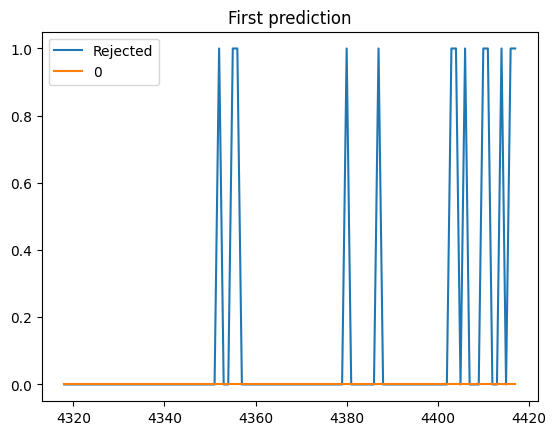

In [120]:
import matplotlib.pyplot as plt
combined.plot()
plt.title('First prediction')

In [121]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train['Rejected'])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds,index=test.index, name='Predictions')
    combined = pd.concat([test['Rejected'], preds], axis=1)
    return combined

In [122]:
def backtest(data, model, predictors, start=0, step=365):
    all_predictions=[]
    for i in range(start, data.shape[0], step):
        if i+ step < data.shape[0]:
            train=data.iloc[0:i].copy()
            test=data.iloc[i:(i+step)].copy()
            predictions = predict(train, test, predictors, model)
            all_predictions.append(predictions)
    return pd.concat(all_predictions)

In [123]:
pr_df['Pr_state'].value_counts()

Pr_state
closed    4370
open        48
Name: count, dtype: int64

In [128]:
def predict(train, test, predictors, model):
    if train.shape[0] == 0:
        raise ValueError()
    model.fit(train[predictors], train['Rejected'])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name='Predictions')
    combined = pd.concat([test['Rejected'], preds], axis=1)
    precision = precision_score(test['Rejected'], preds, average='macro')
    return combined, precision

In [130]:
def backtest(data, model, predictors, start=0, step=365):
    all_predictions = []
    all_precisions = []
    for i in range(start, data.shape[0], step):
        if i + step < data.shape[0]:
            train = data.iloc[0:i].copy()
            test = data.iloc[i:(i+step)].copy()
            if train.shape[0] < 1: 
                continue
            predictions, precision = predict(train, test, predictors, model)
            all_predictions.append(predictions)
            all_precisions.append(precision)

    return pd.concat(all_predictions), sum(all_precisions) / len(all_precisions)
predictors = ['Additions', 'Commits']
model2 = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)
predictions, average_precision = backtest(pr_df, model2, predictors)
print(predictions)
print(average_precision)

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

      Rejected  Predictions
365          0            0
366          0            0
367          0            0
368          0            0
369          0            0
...        ...          ...
4375         0            0
4376         0            0
4377         0            0
4378         0            0
4379         0            0

[4015 rows x 2 columns]
0.6770859277708593


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [131]:
predictions['Predictions'].value_counts()

Predictions
0    4015
Name: count, dtype: int64

In [132]:
precision_score(predictions['Rejected'], predictions['Predictions'],  average='macro')

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


0.4952677459526775

In [134]:
predictions['Rejected'].value_counts()/predictions.shape[0]

Rejected
0    0.990535
1    0.009465
Name: count, dtype: float64

In [138]:
pr_df['Month'] = pd.to_datetime(pr_df['Created_at']).dt.strftime('%m-%Y')

In [153]:
df_temp = pr_df.groupby('Month').agg({
    'Commits':'sum',
    'Additions':'sum'
})

In [154]:
df_temp = df_temp.reset_index('Month')
df_temp['Additions'] = df_temp['Additions']/30
df_temp['Commits'] = df_temp['Commits']/30

In [155]:
df_temp

,Month,Commits,Additions
0,01-2023,45.266667,1737.133333
1,01-2024,33.000000,3184.333333
2,02-2022,2.833333,927.300000
3,02-2023,21.000000,1527.033333
4,02-2024,43.500000,3308.500000
5,03-2022,4.400000,879.800000
6,03-2023,15.066667,919.600000
7,03-2024,40.966667,1811.600000
8,04-2022,4.100000,176.500000
9,04-2023,19.000000,1607.966667


In [156]:
dataset = []
dataset.append(df_temp[(df_temp['Month'] == '06-2024')]['Additions'])
dataset.append(df_temp[(df_temp['Month'] == '05-2024')]['Additions'])
dataset.append(df_temp[(df_temp['Month'] == '12-2023')]['Additions'])
dataset.append(df_temp[(df_temp['Month'] == '10-2023')]['Additions'])
dataset.append(df_temp[(df_temp['Month'] == '01-2024')]['Additions'])